In [256]:
import pandas as pd
df_match = pd.read_csv("MATCHESIPL.csv")
df_delivery = pd.read_csv("DELIVERIESIPL.csv")
# df_delivery.head()
df_match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangaluru,4/18/2008,League,BB McCullum,"M Chinnaswamy Stadium, Bengaluru",Royal challengers Bangaluru,Kolkata Knight Riders,Royal challengers Bangaluru,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,4/19/2008,League,MEK Hussey,I.S. Bindra Punjab Cricket Association Stadiu...,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2008,Delhi,4/19/2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,4/20/2008,League,MV Boucher,"Wankhede Stadium, Mumbai",Mumbai Indians,Royal challengers Bangaluru,Mumbai Indians,bat,Royal challengers Bangaluru,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2008,Kolkata,4/20/2008,League,DJ Hussey,"Eden Gardens, Kolkata",Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


    season  matches
0     2008       58
1     2009       57
2     2010       60
3     2011       73
4     2012       74
5     2013       76
6     2014       60
7     2015       59
8     2016       60
9     2017       59
10    2018       60
11    2019       60
12    2021      120
13    2022       74
14    2023       74
15    2024       71


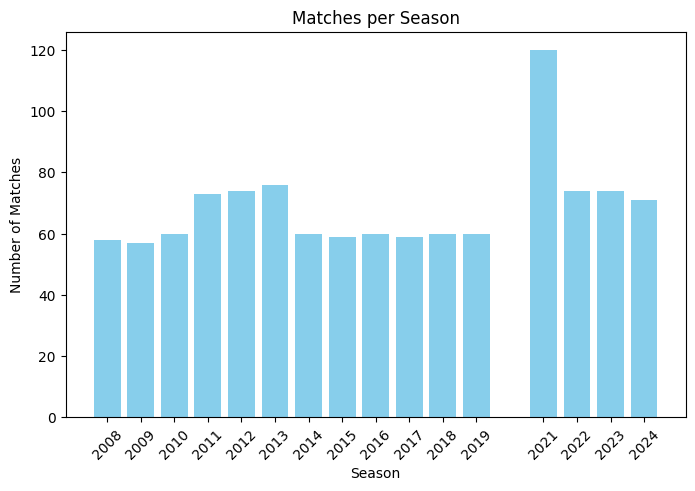

In [240]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by season and count matches
matches_per_season = df_match.groupby('season').size().reset_index(name='matches')

# Sort by season
matches_per_season = matches_per_season.sort_values('season')

print(matches_per_season)

# Plotting
plt.figure(figsize=(8,5))
plt.bar(matches_per_season['season'], matches_per_season['matches'], color='skyblue')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.title('Matches per Season')
plt.xticks(matches_per_season['season'], rotation=45)
plt.show()


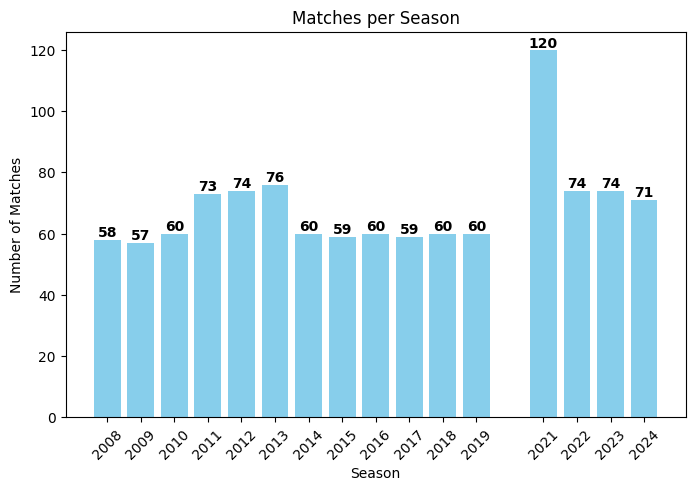

In [242]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by season and count matches
matches_per_season = df_match.groupby('season').size().reset_index(name='matches')
matches_per_season = matches_per_season.sort_values('season')

# Plotting
plt.figure(figsize=(8,5))
bars = plt.bar(matches_per_season['season'], matches_per_season['matches'], color='skyblue')

# Add labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.title('Matches per Season')
plt.xticks(matches_per_season['season'], rotation=45)
plt.show()


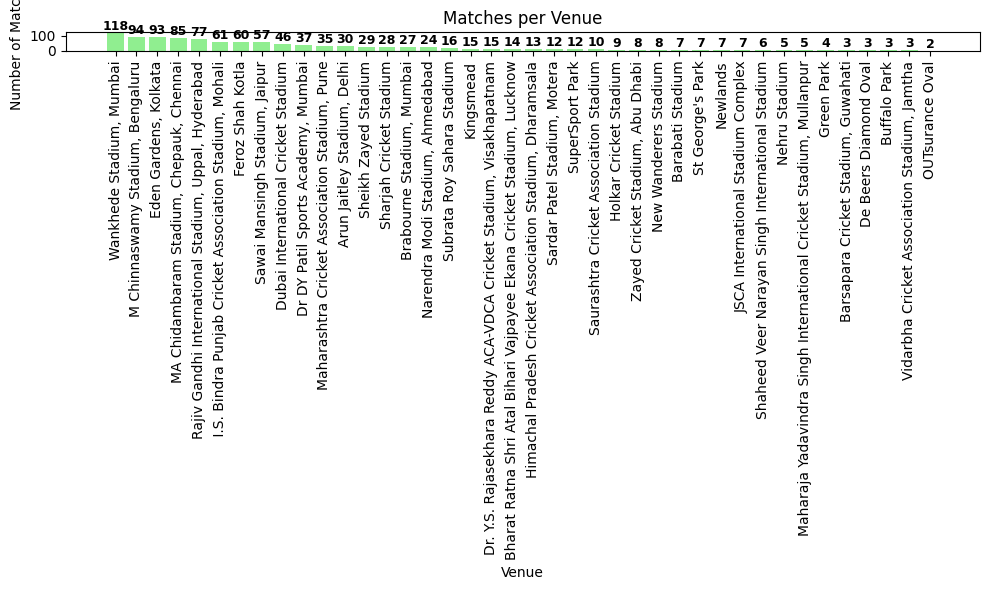

In [244]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by venue and count matches
matches_per_venue = df_match.groupby('venue').size().reset_index(name='matches')

# Sort by matches in descending order
matches_per_venue = matches_per_venue.sort_values('matches', ascending=False)

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(matches_per_venue['venue'], matches_per_venue['matches'], color='lightgreen')

# Add labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)),
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.title('Matches per Venue')
plt.xticks(rotation=90)
plt.tight_layout()  # Prevents label cutoff
plt.show()


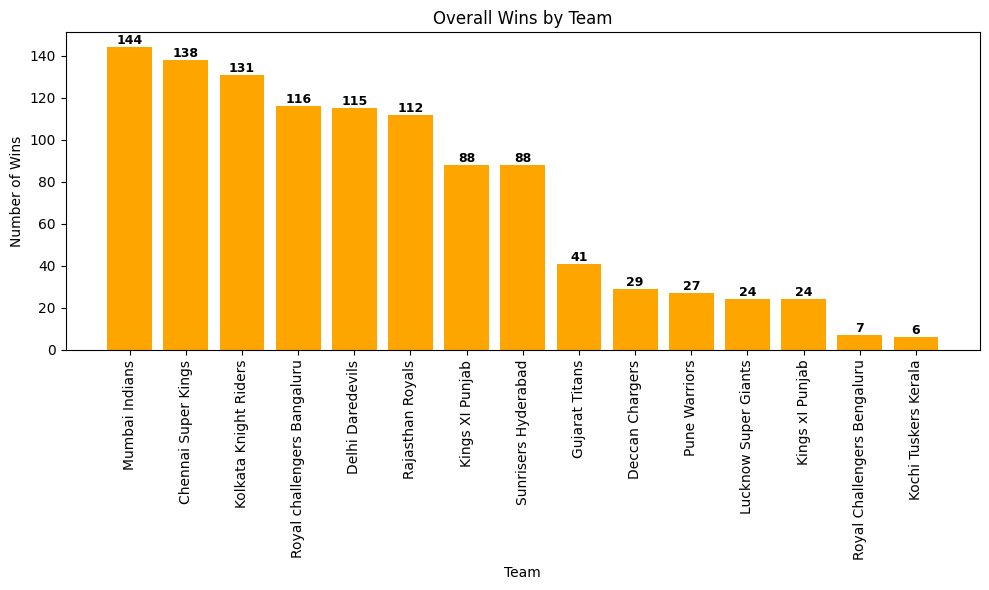

In [246]:
import pandas as pd
import matplotlib.pyplot as plt

# Count wins per team
wins_by_team = df_match['winner'].value_counts().reset_index()
wins_by_team.columns = ['team', 'wins']

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(wins_by_team['team'], wins_by_team['wins'], color='orange')

# Add labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)),
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.title('Overall Wins by Team')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

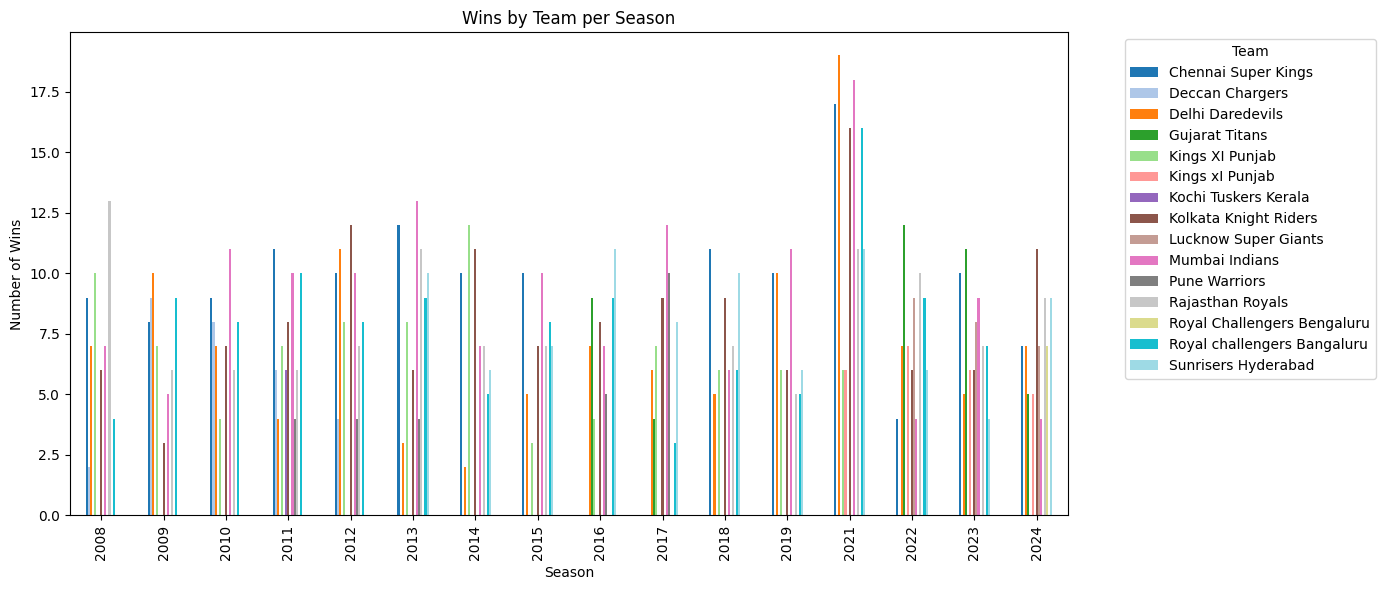

In [248]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by season and winner to count wins
wins_per_season = df_match.groupby(['season', 'winner']).size().reset_index(name='wins')

# Example: Plot for all seasons in one grouped bar chart
plt.figure(figsize=(14,6))

# Pivot for plotting
pivot_df = wins_per_season.pivot(index='season', columns='winner', values='wins').fillna(0)

pivot_df.plot(kind='bar', stacked=False, figsize=(14,6), colormap='tab20')

plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.title('Wins by Team per Season')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


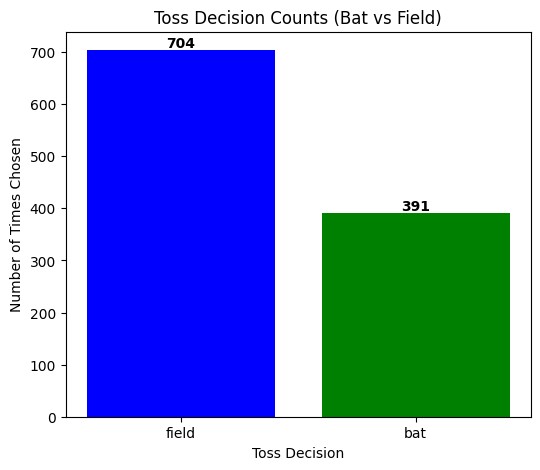

In [250]:
import pandas as pd
import matplotlib.pyplot as plt

# Count toss decisions
toss_decision_counts = df_match['toss_decision'].value_counts().reset_index()
toss_decision_counts.columns = ['decision', 'count']

# Plot
plt.figure(figsize=(6,5))
bars = plt.bar(toss_decision_counts['decision'], toss_decision_counts['count'], color=['blue', 'green'])

# Add labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Toss Decision')
plt.ylabel('Number of Times Chosen')
plt.title('Toss Decision Counts (Bat vs Field)')
plt.show()


Toss winner also won match: 554 out of 1095 matches (50.59%)


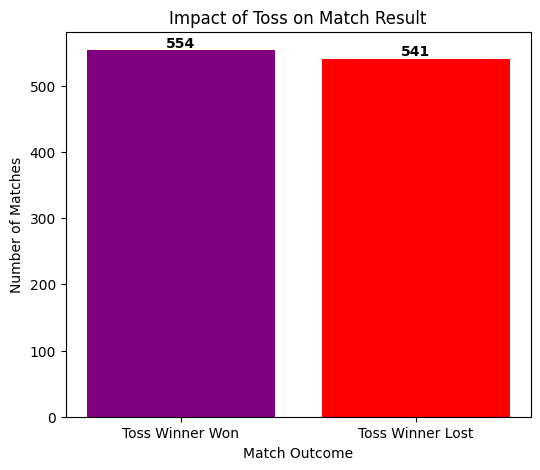

In [252]:
import pandas as pd
import matplotlib.pyplot as plt

# Count matches where toss winner also won the match
same_winner_count = (df_match['toss_winner'] == df_match['winner']).sum()
total_matches = len(df_match)

# Calculate percentage
percentage = (same_winner_count / total_matches) * 100
print(f"Toss winner also won match: {same_winner_count} out of {total_matches} matches ({percentage:.2f}%)")

# Prepare data for plotting
data = pd.DataFrame({
    'Outcome': ['Toss Winner Won', 'Toss Winner Lost'],
    'Count': [same_winner_count, total_matches - same_winner_count]
})

# Plot
plt.figure(figsize=(6,5))
bars = plt.bar(data['Outcome'], data['Count'], color=['purple', 'red'])

# Add labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Match Outcome')
plt.ylabel('Number of Matches')
plt.title('Impact of Toss on Match Result')
plt.show()


In [258]:
# Count frequency of each Player of the Match
player_of_match_freq = df_match['player_of_match'].value_counts().reset_index()

# Rename columns for clarity
player_of_match_freq.columns = ['player_of_match', 'count']

# View the result
player_of_match_freq


,player_of_match,count
0,AB de Villiers,25
1,CH Gayle,22
2,RG Sharma,19
3,V Kohli,18
4,DA Warner,18
...,...,...
286,R Shepherd,1
287,Akash Madhwal,1
288,Shashank Singh,1
289,WD Parnell,1


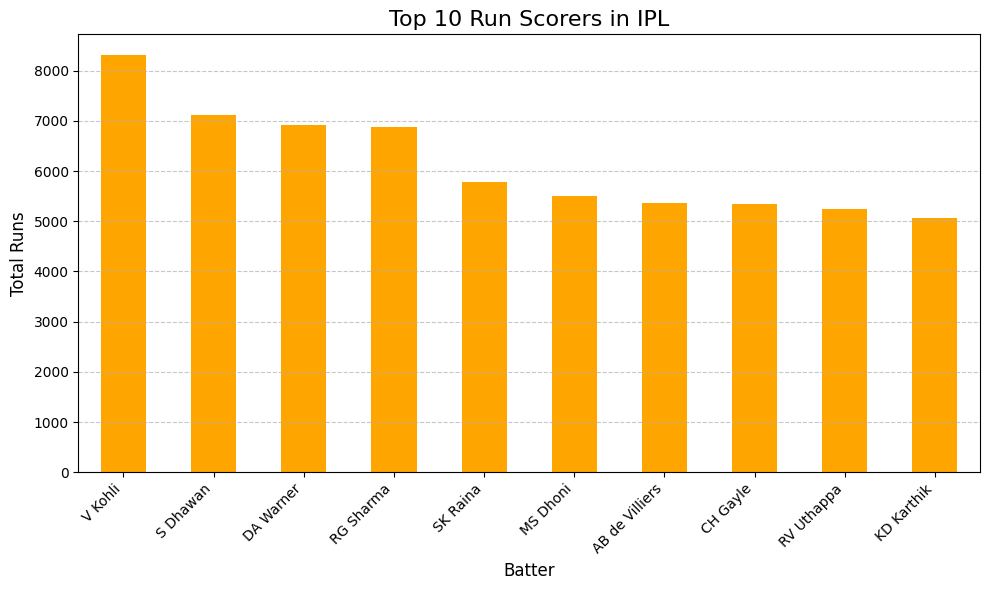

In [266]:

import pandas as pd
import matplotlib.pyplot as plt



# Calculate total runs scored by each batter
top_scorers = df_delivery.groupby("batter")["total_runs"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
top_scorers.plot(kind="bar", color="orange")
plt.title("Top 10 Run Scorers in IPL", fontsize=16)
plt.xlabel("Batter", fontsize=12)
plt.ylabel("Total Runs", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


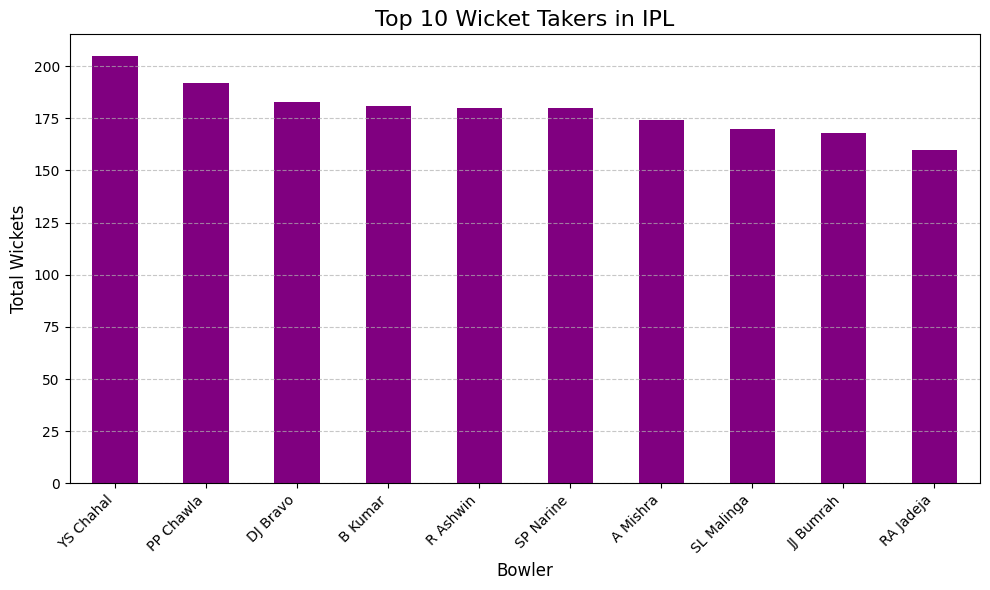

In [268]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only actual wicket deliveries (exclude run outs counted against bowler's wicket tally)
wicket_df = df_delivery[(df_delivery["is_wicket"] == 1) & 
               (~df_delivery["dismissal_kind"].isin(["run out", "retired hurt", "obstructing the field"]))]

# Count wickets per bowler
top_wicket_takers = wicket_df.groupby("bowler")["is_wicket"].count().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
top_wicket_takers.plot(kind="bar", color="purple")
plt.title("Top 10 Wicket Takers in IPL", fontsize=16)
plt.xlabel("Bowler", fontsize=12)
plt.ylabel("Total Wickets", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


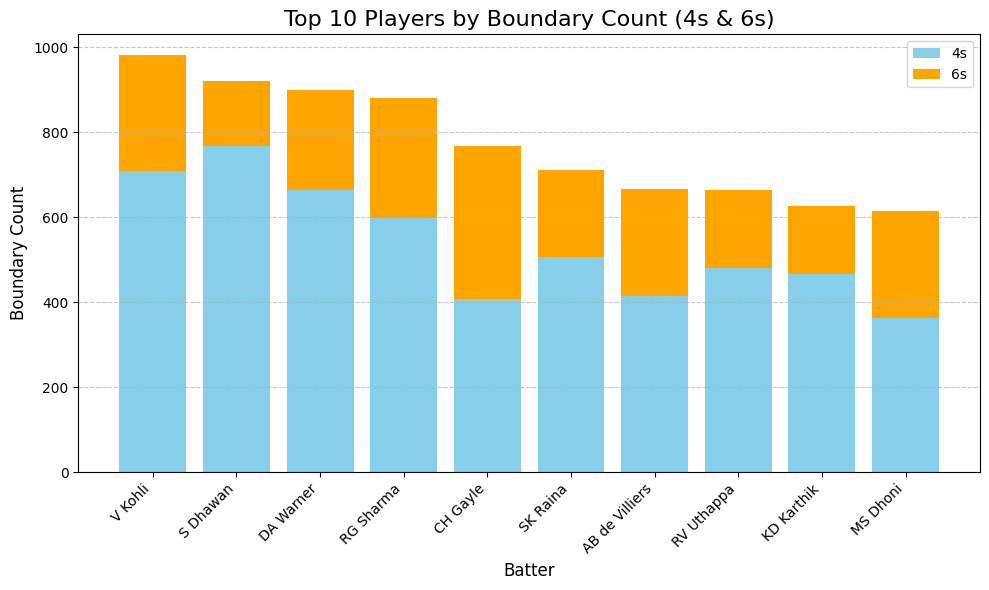

In [270]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only 4s and 6s
boundaries_df = df_delivery[df_delivery["batsman_runs"].isin([4, 6])]

# Count boundaries per batter
boundary_counts = boundaries_df.groupby("batter")["batsman_runs"].count().sort_values(ascending=False).head(10)

# Count 4s and 6s separately for stacked plot
fours = df_delivery[df_delivery["batsman_runs"] == 4].groupby("batter")["batsman_runs"].count()
sixes = df_delivery[df_delivery["batsman_runs"] == 6].groupby("batter")["batsman_runs"].count()

top_players = boundary_counts.index
fours = fours[top_players]
sixes = sixes[top_players]

# Plot stacked bar chart
plt.figure(figsize=(10,6))
plt.bar(top_players, fours, label="4s", color="skyblue")
plt.bar(top_players, sixes, bottom=fours, label="6s", color="orange")

plt.title("Top 10 Players by Boundary Count (4s & 6s)", fontsize=16)
plt.xlabel("Batter", fontsize=12)
plt.ylabel("Boundary Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


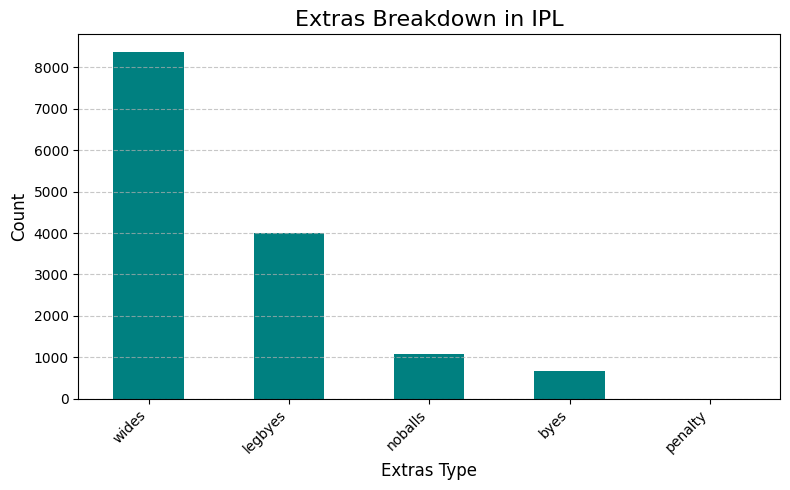

In [272]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only rows with extras
extras_df = df_delivery[df_delivery["extras_type"].notna()]

# Count each extras type
extras_count = extras_df["extras_type"].value_counts()

# Plot
plt.figure(figsize=(8,5))
extras_count.plot(kind="bar", color="teal")
plt.title("Extras Breakdown in IPL", fontsize=16)
plt.xlabel("Extras Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


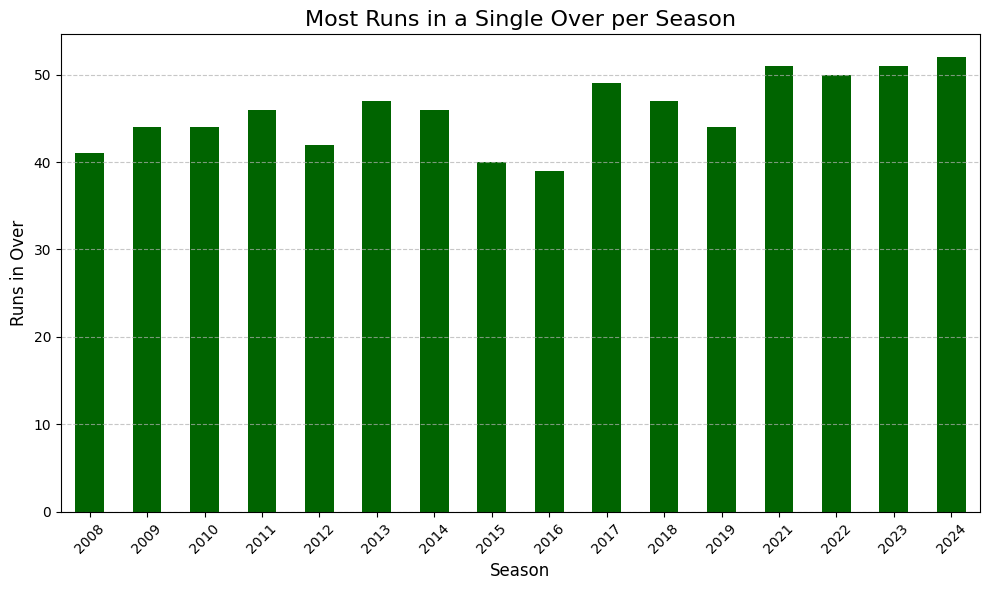

In [274]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
deliveries = pd.read_csv("DELIVERIESIPL.csv")
matches = pd.read_csv("MATCHESIPL.csv")  # contains match_id (id) and season

# Merge to get season info in deliveries
df = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id')

# Calculate runs per over per match
runs_per_over = df.groupby(['season', 'match_id', 'over'])['total_runs'].sum().reset_index()

# Get the max runs in an over for each season
max_runs_per_season = runs_per_over.groupby('season')['total_runs'].max()

# Plot
plt.figure(figsize=(10,6))
max_runs_per_season.plot(kind='bar', color='darkgreen')
plt.title("Most Runs in a Single Over per Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Runs in Over", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Most runs in a single over:
match_id      1422121
over               18
total_runs         52
Name: 20362, dtype: int64


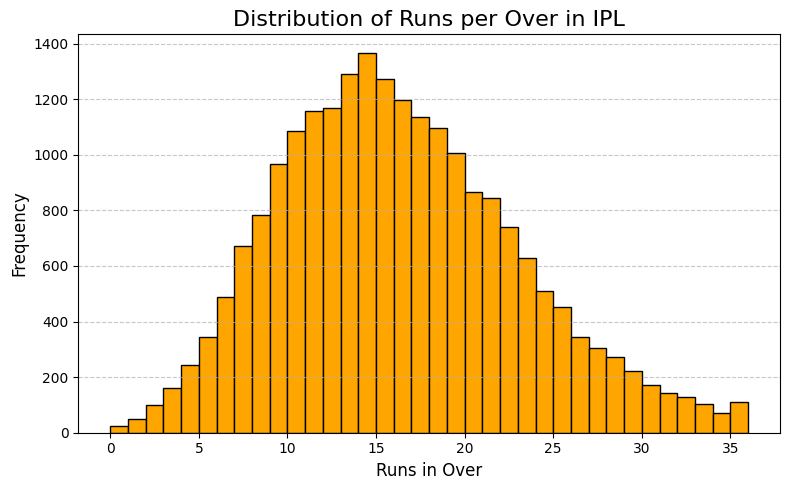

In [277]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate runs per over for each match
runs_per_over = df_delivery.groupby(['match_id', 'over'])['total_runs'].sum().reset_index()

# Get the over with the maximum runs
max_over = runs_per_over.loc[runs_per_over['total_runs'].idxmax()]

print("Most runs in a single over:")
print(max_over)

# Plot histogram of runs per over (to visualize distribution)
plt.figure(figsize=(8,5))
plt.hist(runs_per_over['total_runs'], bins=range(0, 37), edgecolor='black', color='orange')
plt.title("Distribution of Runs per Over in IPL", fontsize=16)
plt.xlabel("Runs in Over", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


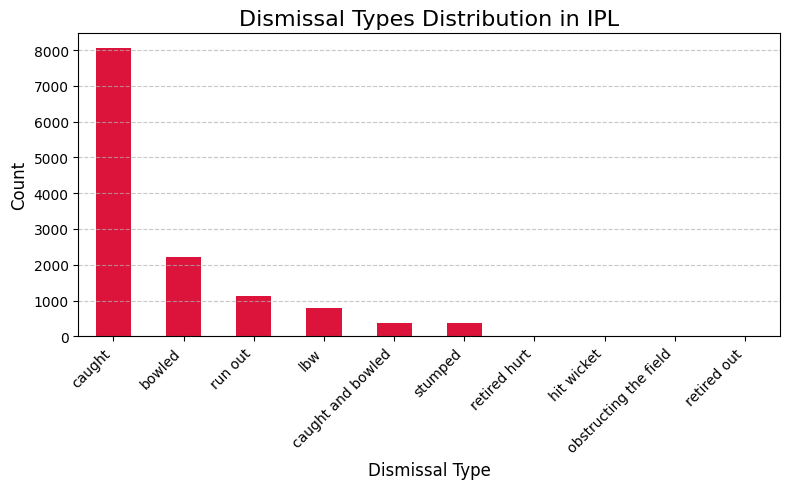

In [ ]:
dedefeevEimport pandas as pd
import matplotlib.pyplot as plt

# Filter only rows where wicket fell
dismissals_df = df_delivery[df_delivery["is_wicket"] == 1]

# Count each dismissal type
dismissal_counts = dismissals_df["dismissal_kind"].value_counts()

# Plot
plt.figure(figsize=(8,5))
dismissal_counts.plot(kind="bar", color="crimson")
plt.title("Dismissal Types Distribution in IPL", fontsize=16)
plt.xlabel("Dismissal Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


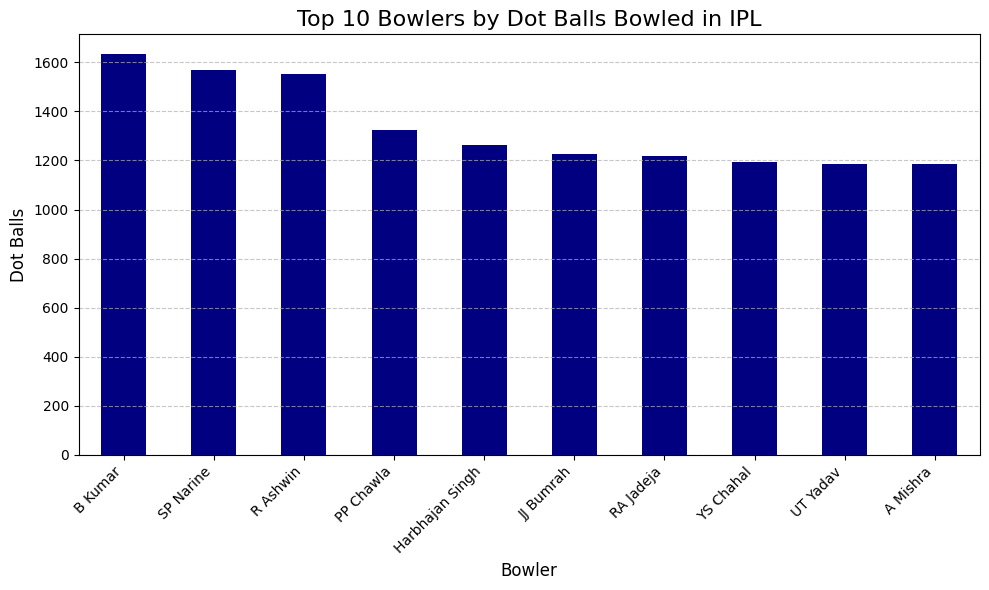

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter dot balls (no runs, no extras)
dot_balls_df = df_delivery[(df_delivery["total_runs"] == 0) & (df_delivery["extras_type"].isna())]

# Count dot balls by bowler
dot_balls_count = dot_balls_df.groupby("bowler")["total_runs"].count().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
dot_balls_count.plot(kind="bar", color="navy")
plt.title("Top 10 Bowlers by Dot Balls Bowled in IPL", fontsize=16)
plt.xlabel("Bowler", fontsize=12)
plt.ylabel("Dot Balls", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Top 10 Partnerships:
       match_id  inning                             pair  total_runs
7433     980987       1        (AB de Villiers, V Kohli)         229
6698     829795       1        (AB de Villiers, V Kohli)         215
14517   1426297       1  (B Sai Sudharsan, Shubman Gill)         210
12575   1304112       1            (KL Rahul, Q de Kock)         210
3183     501260       1         (AC Gilchrist, SE Marsh)         206
4166     548372       1              (CH Gayle, V Kohli)         204
3656     548329       2             (DA Warner, NV Ojha)         189
9401    1175366       1         (DA Warner, JM Bairstow)         185
7692    1082593       2             (CA Lynn, G Gambhir)         184
10532   1216527       1           (KL Rahul, MA Agarwal)         183


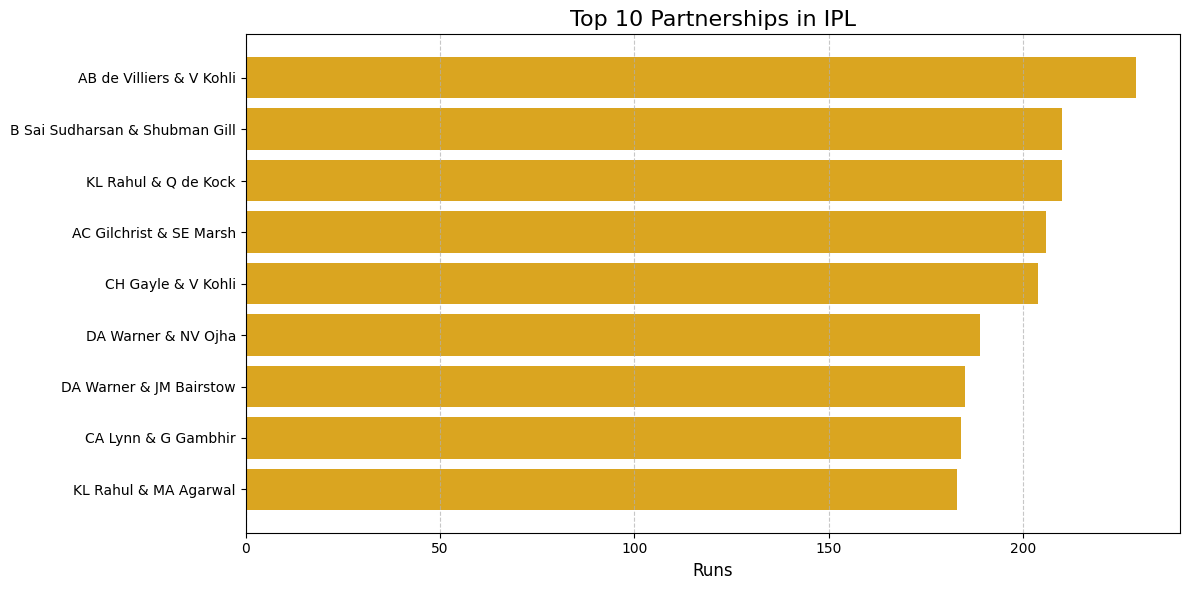

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("DELIVERIESIPL.csv")

# Create a sorted tuple for each batting pair so order doesn't matter
df['pair'] = df.apply(lambda x: tuple(sorted([x['batter'], x['non_striker']])), axis=1)

# Calculate total runs for each pair in each match and innings
partnerships = df.groupby(['match_id', 'inning', 'pair'])['total_runs'].sum().reset_index()

# Get the top 10 partnerships overall
top_partnerships = partnerships.sort_values(by='total_runs', ascending=False).head(10)

print("Top 10 Partnerships:")
print(top_partnerships)

# Plot
plt.figure(figsize=(12,6))
plt.barh(
    [f"{p[0]} & {p[1]}" for p in top_partnerships['pair']], 
    top_partnerships['total_runs'], 
    color="goldenrod"
)
plt.title("Top 10 Partnerships in IPL", fontsize=16)
plt.xlabel("Runs", fontsize=12)
plt.gca().invert_yaxis()  # Highest at top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
